1- The probability of having more than of 25 noisy examples in a sample of size 50 drawn from a dataset with $40\%$ noisy examples can be computed as: 
$p(x > 25) = 1 - p(x \leq 25) = 1- (p (x = 0) + \cdots + p(x = 25))$

where each of these probabilities is a binomial trail. Hence, the solution can be computed as:
$1 - (\sum_{i=0}^{25}{50 \choose i}(0.4)^i (0.6)^{50-i}) = 0.06$


2- Based on the given formula in the question, since $\delta$ is in the logarithm, it has a lower effect than $\epsilon$.

3- In PAC theory, there is no assumption about the type of the distribution, but it should be fixed. 

4- The generalization error bound is about the tail of the generalization error distribution, and the expected generalization value is tipically lower than this value.  

5- Based on the given formula, lower bound on the number of examples can be computed as: 

  $\frac{1}{0.1} (\log(3^3) + \log(\frac{1}{0.05})$) = 62.9
 

6- To keep the same bound, the value of the squre root should not change. By doubling $\delta$, number of required examples ($m_x$) can be computed as: 
$\frac{\log\frac{2}{\delta}}{2m} = \frac{\log\frac{2}{2\delta}}{2m_x}$, Solving this math equation, and substituting the original data value $\delta = 0.1$, gives us $m_x = 0.8 m$

7- Bayes error is the minimum achievable error for a data set with known underlying distribution and no learner can achive a lower error than the Bayes error.

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
import matplotlib.pyplot as plt
x = [0, 1, 3, 4, 6, 8, 9]
y = [2, 5, 7, 6, 8, 14, 12]
N = np.shape(x)
x_ext = np.transpose(np.vstack([np.ones(N),np.array(x)]))
reg = LinearRegression(fit_intercept=False).fit(x_ext, y)
print("regression coefficients are: ",reg.coef_)

regression coefficients are:  [2.70491803 1.13114754]


Coefficient b0 is:  2.7049180327868854
Coefficient b1 is:  1.1311475409836065


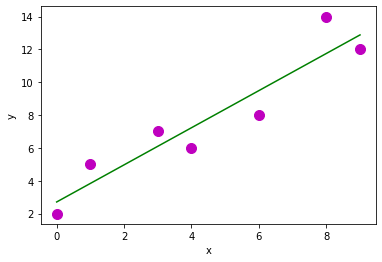

In [8]:
#computes the slope and intercept for the linear regressor that fits the best the above data
m_x, m_y = np.mean(x), np.mean(y)# calculating mean for x and y vectors  
# calculating regression coefficients 
b1 = np.sum((x-m_x)*(y-m_y))/np.sum(np.power((x-m_x),2))
b0 = m_y - b1*m_x 
print("Coefficient b0 is: ",b0 )
print("Coefficient b1 is: ",b1 )
#plot the linear regressor
plt.scatter(x, y, color = "m", marker = "o", s = 100) 
# predicted response vector 
y_pred = b0 + b1*np.array(x)# plotting the regression line 
plt.plot(x, y_pred, color = "g") 
# putting labels 
plt.xlabel('x') 
plt.ylabel('y') 
#show plot 
plt.show()

Now lets look at linear regression problem as an optimization problem. Using vectorize opertaions, find the optimium coefficients. 

In [3]:
XTX = inv(np.matmul(np.transpose(x_ext),x_ext))
XTY = np.matmul(np.transpose(x_ext),y)
beta = np.matmul(XTX, XTY)
print("regression coefficients are: ", beta)



regression coefficients are:  [2.70491803 1.13114754]


10- Prediction of the outputs for the given test inputs:

In [4]:
xte = [2, 7]
Nte = np.shape(xte)
xte_ext = np.transpose(np.vstack([np.ones(Nte),np.array(xte)]))
print("predicted outputs: ",reg.predict(xte_ext))

predicted outputs:  [ 4.96721311 10.62295082]


Or you can simply use matrix multiplication:


In [6]:
np.matmul(xte_ext,np.transpose(beta))

array([ 4.96721311, 10.62295082])

9- Based on the given formula for covariance and variance we can compute the devision given in the question. 
As we see, The slope of the fitted linear regressor, in fact, is the covariance divided by the variance of the independent variable

In [19]:
cov = np.mean((x-m_x)*(y-m_y))
var = np.mean(abs(x-m_x)**2) 
print ("slpoe = b1 = (covariance/variance) =  ", cov /var)


slpoe = b1 = (covariance/variance) =   1.1311475409836065
